In [59]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [60]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [61]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [62]:
y_train.shape

(50000, 1)

In [63]:
y_train[0]

array([6], dtype=uint8)

In [64]:
y_train = y_train.reshape(-1,)
y_train[0]

6

In [65]:
name_dic = {0:'airplane', 1:'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [66]:
name_dic[y_train[0]]

'frog'

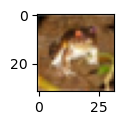

In [67]:
plt.figure(figsize = (5,1))
plt.imshow(X_train[0])

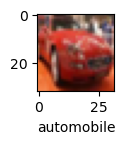

In [68]:
name_dic = {0:'airplane', 1:'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

def plot_sample(X, y, index):
    plt.figure(figsize = (5,1))
    plt.imshow(X[index])
    plt.xlabel(name_dic[y[index]])

plot_sample(X_train, y_train, 5)

In [69]:
X_train = X_train/255
X_test = X_test/255

In [75]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.3025 - loss: 1.9326
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4201 - loss: 1.6435
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4538 - loss: 1.5498
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4728 - loss: 1.4918
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4922 - loss: 1.4382


In [77]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4502 - loss: 1.5891


[1.5914489030838013, 0.4431999921798706]

In [79]:
from sklearn.metrics import classification_report

y_preds = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_preds]

print('Classification Report: ', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:                precision    recall  f1-score   support

           0       0.64      0.40      0.49      1000
           1       0.69      0.49      0.57      1000
           2       0.45      0.24      0.31      1000
           3       0.32      0.31      0.31      1000
           4       0.50      0.22      0.31      1000
           5       0.46      0.29      0.36      1000
           6       0.41      0.71      0.52      1000
           7       0.29      0.85      0.43      1000
           8       0.62      0.62      0.62      1000
           9       0.70      0.30      0.42      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.44     10000
weighted avg       0.51      0.44      0.44     10000



In [87]:
cnn = models.Sequential([
    # Convolution
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3835 - loss: 1.6893
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6000 - loss: 1.1406
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6505 - loss: 1.0025
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6834 - loss: 0.9107
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7068 - loss: 0.8505
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7278 - loss: 0.7864
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7472 - loss: 0.7375
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7616 - loss: 0.6911
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7711 - loss: 0.6571
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7852 - loss: 0.6210


In [89]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6894 - loss: 0.9441


[0.9533166885375977, 0.6880000233650208]

In [91]:
y_test[0]

array([3], dtype=uint8)

In [93]:
y_test = y_test.reshape(-1,)
y_test[0]

3

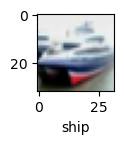

In [97]:
plot_sample(X_test, y_test, 1)

In [163]:
y_pred = cnn.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.9746187e-03, 3.0151283e-04, 1.9576480e-03, ..., 3.4454584e-05,
        1.8763165e-03, 2.1607322e-05],
       [3.4804511e-04, 5.7800887e-03, 1.3492006e-07, ..., 1.5312711e-11,
        9.9385649e-01, 1.5255940e-05],
       [6.0060436e-01, 7.1596503e-02, 1.4716302e-03, ..., 9.5943664e-04,
        3.1333914e-01, 1.0297543e-02],
       ...,
       [1.2670879e-04, 7.2774378e-07, 3.5796434e-02, ..., 2.0162305e-01,
        3.7606009e-05, 3.1776206e-06],
       [1.5499103e-03, 6.6307437e-01, 4.3761842e-03, ..., 1.5629940e-03,
        1.2220544e-03, 2.4106067e-03],
       [3.5202709e-07, 1.6483094e-08, 1.7597677e-06, ..., 9.9981910e-01,
        2.3181563e-09, 3.7568608e-08]], dtype=float32)

In [169]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [167]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

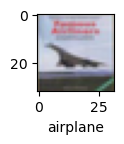

In [173]:
plot_sample(X_test, y_test, 3)

In [171]:
name_dic[y_classes[3]]

'airplane'

In [177]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1000
           1       0.79      0.84      0.81      1000
           2       0.53      0.63      0.57      1000
           3       0.54      0.49      0.51      1000
           4       0.74      0.51      0.60      1000
           5       0.57      0.64      0.60      1000
           6       0.83      0.69      0.75      1000
           7       0.72      0.77      0.74      1000
           8       0.83      0.75      0.79      1000
           9       0.79      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

